In [172]:
import random
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Patch
from matplotlib.collections import PatchCollection

colors = ["#0082c8", "#3cb44b", "#e6194b", "#000000",
          "#aa6e28", "#911eb4", "#FFDC00", "#f58231",
          "#d2f53c", "#7FDBFF", "#C09F0C"]

In [192]:
dataFile = "data_3800_seed_03623.ascii.0.dat"
r = 0.012 ## Interaction radious

In [196]:
data = np.genfromtxt(dataFile, usecols=(2,3)).tolist()
for i,d in enumerate(data): print i, d

x, y = zip(*data)
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)

kdt = KDTree(data)

nbrhd = [set(nbr) for nbr in kdt.query_ball_point(data, r=r)]
#for nbr in nbrhd: print nbr

#plt.scatter(x, y)
#plt.show()

0 [-0.0112086044, -0.00565774271]
1 [0.00364260005, 0.0305689081]
2 [-0.0515890304, -0.0166130021]
3 [0.0184437661, 0.00691100284]
4 [0.0305913532, -0.00637371946]
5 [0.00234099706, 0.00464655827]
6 [0.0371517293, -0.0240889689]
7 [-0.00403138703, -0.0417041723]
8 [-0.040311793, 0.00713306821]
9 [-0.0119475105, -0.0181671738]
10 [-0.0241783715, 0.0174082709]
11 [-0.0433830364, -0.0100836939]
12 [-0.0148081996, 0.0114060363]
13 [0.0028781553, -0.0484901521]
14 [0.0194926149, -0.0402840043]
15 [0.0209192401, 0.0232116334]
16 [0.0166870225, 0.0492513298]
17 [0.0194768687, -0.00324684894]
18 [-0.0148440719, -0.0455974048]
19 [0.00381421139, 0.0288227727]
20 [0.00236266348, 0.0387412761]
21 [-0.0376032177, -0.0111737478]
22 [-0.0308901222, 0.0287103383]
23 [0.0489399411, 0.0303889893]
24 [0.00646995566, -0.042947082]
25 [0.0196949723, -0.0561135933]
26 [-0.0206758008, -0.022818962]
27 [0.0315676791, -0.0443890611]
28 [0.0271199911, 0.0475318745]
29 [0.0441737227, -0.0357735906]
30 [-0.00841

In [194]:
### Finding Clusters
count = 2
while count>1:
    cluster = [set([])]
    for nbr in nbrhd:
        #print '\ncluster:', cluster
        #print 'nbr:', nbr

        count = 0
        for i,c in enumerate(cluster):
            if c == set([]):
                cluster[i] = nbr
                count += 1
            elif c & nbr != set([]):
                cluster[i] = c | nbr
                count += 1            

        if count == 0:
            cluster.append(nbr)

    nbrhd = cluster 

## Get a sorted list of clusters
cluster = [sorted(list(c)) for c in cluster]

clusterP = []
for i,c in enumerate(cluster):
    temp = []
    for pId in c:
        temp.append(data[pId])
    clusterP.append(temp)
    
## Print all the points in clusters
# Print 'Clusters:'
#for p in clusterP: print p

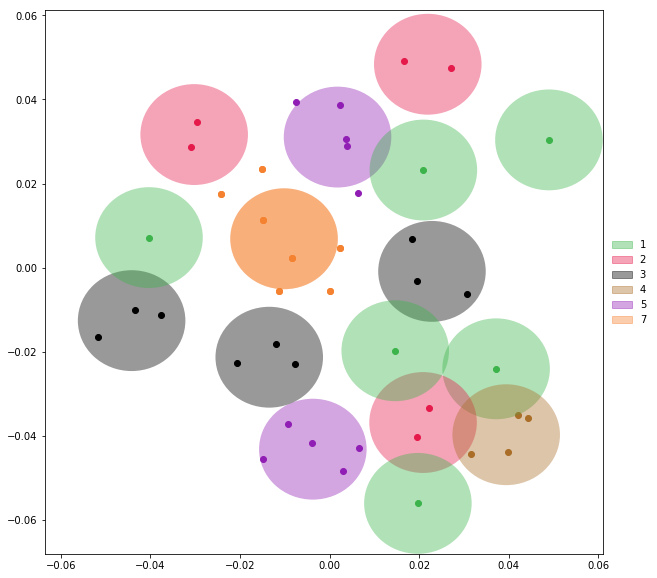

In [195]:
patches = []
plt.rcParams["figure.figsize"] = 10,10
fig, ax = plt.subplots()
alpha = 0.4

nused = set()
for i,points in enumerate(clusterP):
    n = len(points)
    nused.add(n)
    plt.scatter(*zip(*points), color=colors[n%11])
    if len(points) == 1:
        ax.add_artist(Circle(points[0], r, fc=colors[n%11], alpha=alpha))
    else:
        cm = [0, 0]
        for p in points:
            cm = np.add(p, cm)
        cm /= len(points)
        ax.add_artist(Circle(cm, r, fc=colors[n%11], alpha=alpha))

legnd = []
for n in nused:
    legnd.append(Patch(color=colors[n%11], alpha=alpha, label=str(n)))
    
plt.legend(handles=legnd, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(xmin-r, xmax+r)
plt.ylim(ymin-r, ymax+r)
plt.show()